In [46]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
import scipy
from IPython.display import display, Latex

In [58]:
t, x = sp.symbols("t, x")

A = 1
B = 3

n = 2

T = 5

C = 5

c = 1

L = lambda y: sp.diff(y, t) - c * sp.diff(y, x)

L_0 = [lambda y: y, lambda y: sp.diff(y, x)]

L_G = [lambda y: y]

H = sp.Piecewise((0, t <= 0), (1, t > 0))

G = H.subs({t: t - abs(x) / c}) / 2 / c

y_expr = x*x + (t - 1) ** 2


zero = np.random.uniform(0.0001, 9.0002)

In [25]:
G

Piecewise((0, t - Abs(x) <= 0), (1, True))/2

In [26]:
def cartesian_product(x, y):
    return np.dstack(np.meshgrid(x, y)).reshape(-1, 2)

def generate_space():
    eps = np.random. uniform(0.0001,0.0002)

    space = np.linspace(A, B, n)
    time = np.linspace(0, T, n)
    space_time = cartesian_product(space, time)

    pre_time = np.linspace(-C, -eps, n)
    space_pre_time = cartesian_product(space, pre_time)

    pre_space = np.linspace(A - c, A - eps, n)

    post_space = np.linspace(B + eps, B + c, n)

    out_space = np.concatenate((pre_space, post_space), axis=0)
    out_space_time = cartesian_product(out_space, time)
    
    return space, space_time, space_pre_time, out_space_time

In [27]:
S, S_T, S_0, S_G = generate_space()

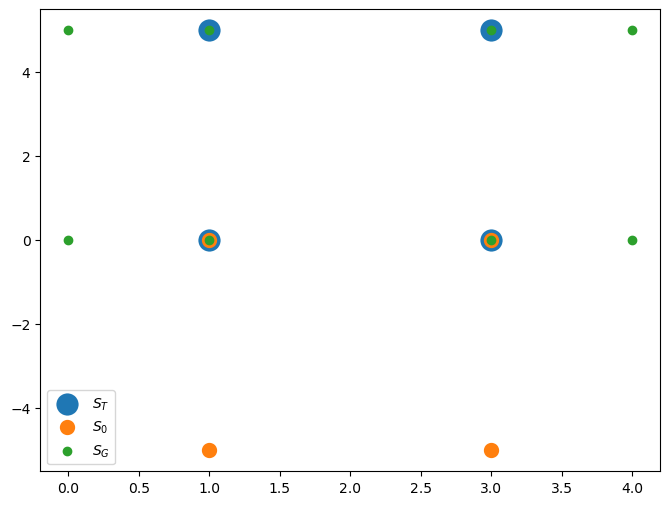

In [29]:
plt.figure(figsize=(8, 6))
plt.scatter(S_T[:, 0], S_T[:, 1], label="$S_T$", linewidths=10)
plt.scatter(S_0[:, 0], S_0[:, 1], label="$S_0$", linewidths=5)
plt.scatter(S_G[:, 0], S_G[:, 1], label="$S_G$")
plt.legend()
plt.show()

In [43]:
def generate_B(S_0, S_G):
    start = A

    r_0, m_0 = len(L_0), len(S_0)

    B_11 = np.zeros((r_0, m_0)).tolist()

    for i in range(r_0):
        for j in range(m_0):
            s_x, s_t = S_0[j]
            expr = L_0[i](G.subs([(x, x - s_x), (t, t - s_t)])).subs(t, zero)
            B_11[i][j] = expr

    B_11 = sp.Matrix(B_11)

    r_0, m_0 = len(L_0), len(S_G)

    B_12 = np.zeros((r_0, m_0)).tolist()

    for i in range(r_0):
        for j in range(m_0):
            s_x, s_t = S_G[j]
            expr = L_0[i](G.subs([(x, x - s_x), (t, t - s_t)])).subs(t, zero)
            B_12[i][j] = expr

    B_12 = sp.Matrix(B_12)

    r_G, m_0 = len(L_G), len(S_0)
    B_21 = np.zeros((r_G, m_0)).tolist()
    for i in range(r_G):
        for j in range(m_0):
            s_x, s_t = S_0[j]
            expr = L_G[i](G.subs([(x, x - s_x), (t, t - s_t)])).subs(x, start)
            B_21[i][j] = expr

    B_21 = sp.Matrix(B_21)


    r_G, m_G = len(L_G), len(S_G)
    B_22 = np.zeros((r_G, m_G)).tolist()
    for i in range(r_G):
        for j in range(m_G):
            sx, st = S_G[j]
            expr = L_G[i](G.subs([(x, x - s_x), (t, t - s_t)])).subs(x, start)
            B_22[i][j] = expr
    B_22 = sp.Matrix(B_22)

    B=[
    [B_11, B_12],
    [B_21, B_22]
    ]

    return B

In [44]:
B = generate_B(S_0, S_G)

In [53]:
B[0][0]

Matrix([
[Piecewise((0, Abs(x - 1.0) - 5.4719045151521 >= 0), (1, True))/2, Piecewise((0, Abs(x - 3.0) - 5.4719045151521 >= 0), (1, True))/2, Piecewise((0, Abs(x - 1.0) - 0.472057277506411 >= 0), (1, True))/2, Piecewise((0, Abs(x - 3.0) - 0.472057277506411 >= 0), (1, True))/2],
[                                                               0,                                                                0,                                                                  0,                                                                  0]])

In [54]:
def intagrate_S(M):
    n, m = len(M), len(M[0])

    X = np.zeros((n, m)).tolist()

    for i in range(n):
        for j in range(m):
            f_expr = M[i][j]
            f = lambda x_val: f_expr.subs({x, x_val}).evalf()
            X[i][j] = scipy.integrate.quad(f, A, B)[0]
    
    return X

In [59]:
def intagrate_G(M):

    n, m = len(M), len(M[0])

    X = np.zeros((n, m)).tolist()

    for i in range(n):
        for j in range(m):
            f_expr = M[i][j]
            f = lambda x_val, t_val: f_expr.subs({x: x_val, t: t_val}).evalf()
            val1 = scipy.integrate.quad(lambda t: f(A, t), zero, T)[0]
            val2 = scipy.integrate.quad(lambda t: f(B, t), zero, T)[0]
            X[i][j] = val1 + val2

    return X